In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import requests
import io
from imblearn.over_sampling import SMOTE

# Load data

In [2]:
import pandas as pd

#url = "1oSKXl5OeAXfDLtW34gfUgOhRDBkYZE5s/view?usp=sharing"
#file_id = "1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7?usp=sharing"
#url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv("youtube_shorts_performance_dataset.csv")

In [3]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)


In [4]:
df.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech


In [5]:
df.shape

(300, 10)

In [6]:
df.tail()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
295,vid_1295,Short Video #295,15,3,248940,23810,488,1247,12,Tech
296,vid_1296,Short Video #296,32,4,366340,29586,46,1548,8,Travel
297,vid_1297,Short Video #297,29,3,434027,6471,3359,1069,21,Comedy
298,vid_1298,Short Video #298,54,4,318623,6459,4873,1690,14,Food
299,vid_1299,Short Video #299,27,6,217464,40731,4806,1136,13,Tech


In [7]:
df.shape

(300, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    object
dtypes: int64(7), object(3)
memory usage: 23.6+ KB


In [8]:
df.describe()

,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,31.730000,4.343333,245058.166667,23063.126667,2638.296667,999.576667,11.543333
std,16.042912,2.956562,141338.982093,14597.458220,1416.827287,564.410105,6.814414
min,5.000000,0.000000,1404.000000,109.000000,40.000000,2.000000,0.000000
25%,18.000000,2.000000,129620.500000,10342.000000,1445.750000,516.250000,6.000000
50%,32.000000,4.000000,255962.000000,21779.500000,2863.500000,988.000000,12.000000
75%,45.000000,7.000000,356805.000000,36706.500000,3761.000000,1463.750000,17.000000
max,59.000000,9.000000,499401.000000,49923.000000,4971.000000,1998.000000,23.000000


In [10]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

Duplicate rows: 0


In [11]:
def analyze_target(df: pd.DataFrame, target_col: str) -> dict:
    " analyzes the target column of a dataframe and returns relevant statistics "

    if target_col not in df.columns:
        raise ValueError(f"{target_col} not found in dataframe")

    target_series = df[target_col]
    target_numeric = target_series.astype("int8")

    return {
        "target_column": target_col,
        "dtype": str(target_series.dtype),
        "unique_values": target_series.unique().tolist(),
        "value_counts": target_series.value_counts(normalize=True).to_dict(),
        "mean_ctr": target_numeric.mean()
    }

# EDA


In [12]:
import pandas as pd

def load_data(path: str) -> pd.DataFrame:
    """
    Load dataset from a given path.
    """
    return pd.read_csv(path)

In [13]:
def get_dimensions(df:pd.DataFrame) -> dict:
  " get dimensions"
  rows,cols = df.shape
  return {"rows":rows,"cols":cols}

## missing values

In [14]:
def cardinality_report(df:pd.DataFrame)-> pd.DataFrame:
    cardinality = pd.DataFrame({
        "unique_values": df.nunique(),
        "missing_values": df.isna().sum()
        }).sort_values(by="unique_values", ascending=False)

    return cardinality

cardinality_report(df)

,unique_values,missing_values
video_id,300,0
title,300,0
views,300,0
likes,299,0
comments,288,0
shares,274,0
duration_sec,54,0
upload_hour,24,0
hashtags_count,10,0
category,6,0


In [15]:
def missing_values_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns count and percentage of missing values per column.
    """
    missing_count = df.isna().sum()
    missing_pct = (missing_count / len(df)) * 100

    summary = pd.DataFrame({
        "missing_count": missing_count,
        "missing_percentage": missing_pct
    })
    temp= summary[summary["missing_count"]>0].sort_values(by='missing_percentage', ascending=False)
    return temp

missing_values_summary(df)

,missing_count,missing_percentage


## classify columns

In [16]:
def classify_columns(
    df: pd.DataFrame
) -> dict:


    '''datetime_cols = []
    for col in df.columns:
        try:
            pd.to_datetime(df[col])
            datetime_cols.append(col)
        except ValueError:
            pass'''

    numerical_cols = []
    categorical_cols = []

    for col in df.columns:

        if pd.api.types.is_numeric_dtype(df[col]):
            unique_ratio = df[col].nunique() / len(df)
            print(unique_ratio)
            if unique_ratio < 0.05:
                categorical_cols.append(col)
            else:
                numerical_cols.append(col)
        else:
            categorical_cols.append(col)

    return {
        "numerical_features": numerical_cols,
        "categorical_features": categorical_cols
    }
#"datetime_features": sorted(datetime_cols)

In [17]:
cat_cols= classify_columns(df)["categorical_features"]
num_cols= classify_columns(df)["numerical_features"]
print(df.columns)
print("catcols",cat_cols)
print("numcols",num_cols)

0.18
0.03333333333333333
1.0
0.9966666666666667
0.96
0.9133333333333333
0.08
0.18
0.03333333333333333
1.0
0.9966666666666667
0.96
0.9133333333333333
0.08
Index(['video_id', 'title', 'duration_sec', 'hashtags_count', 'views', 'likes',
       'comments', 'shares', 'upload_hour', 'category'],
      dtype='object')
catcols ['video_id', 'title', 'hashtags_count', 'category']
numcols ['duration_sec', 'views', 'likes', 'comments', 'shares', 'upload_hour']


## target col analysis

In [18]:
def analyze_target_col(df: pd.DataFrame, target_col: str) -> dict:


    if target_col not in df.columns:
        raise ValueError(f"{target_col} not found in dataframe")

    target_series = df[target_col]
    target_numeric = target_series.astype("int8")

    return {
        "target_column": target_col,
        "dtype": str(target_series.dtype),
        "mean_engagement": target_numeric.mean()
    }


In [19]:
def impose_cat_cols(df:pd.DataFrame, cat_cols:list)->pd.DataFrame:
    for col in cat_cols:
        df[col] = df[col].astype("category")
    return df

impose_cat_cols(df,cat_cols)

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech
...,...,...,...,...,...,...,...,...,...,...
295,vid_1295,Short Video #295,15,3,248940,23810,488,1247,12,Tech
296,vid_1296,Short Video #296,32,4,366340,29586,46,1548,8,Travel
297,vid_1297,Short Video #297,29,3,434027,6471,3359,1069,21,Comedy
298,vid_1298,Short Video #298,54,4,318623,6459,4873,1690,14,Food


# phase 1 EDA

In [20]:
from typing import Optional, Dict
import pandas as pd
def run_phase1_eda(df: pd.DataFrame, target_col: Optional[str] = None) -> Dict:
    """
    Runs Phase-1 EDA.
    Works for both training data (with target)
    and test data (without target).
    """

    results = {
        "dimensions": get_dimensions(df),
        "column_classification": classify_columns(df),
        "missing_values": missing_values_summary(df)
    }

    # Run target analysis ONLY if target exists
    if target_col is not None and target_col in df.columns:
        results["target_analysis"] = analyze_target_col(df, target_col)
    else:
        results["target_analysis"] = None

    return results

 # Target column preparation

In [21]:
df["Engagement_Rate"] = (df["likes"] + df["comments"] + df["shares"]) / df["views"]

In [22]:
df.describe()

,duration_sec,views,likes,comments,shares,upload_hour,Engagement_Rate
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,31.730000,245058.166667,23063.126667,2638.296667,999.576667,11.543333,0.430577
std,16.042912,141338.982093,14597.458220,1416.827287,564.410105,6.814414,1.753319
min,5.000000,1404.000000,109.000000,40.000000,2.000000,0.000000,0.003509
25%,18.000000,129620.500000,10342.000000,1445.750000,516.250000,6.000000,0.064102
50%,32.000000,255962.000000,21779.500000,2863.500000,988.000000,12.000000,0.106933
75%,45.000000,356805.000000,36706.500000,3761.000000,1463.750000,17.000000,0.215850
max,59.000000,499401.000000,49923.000000,4971.000000,1998.000000,23.000000,21.220085


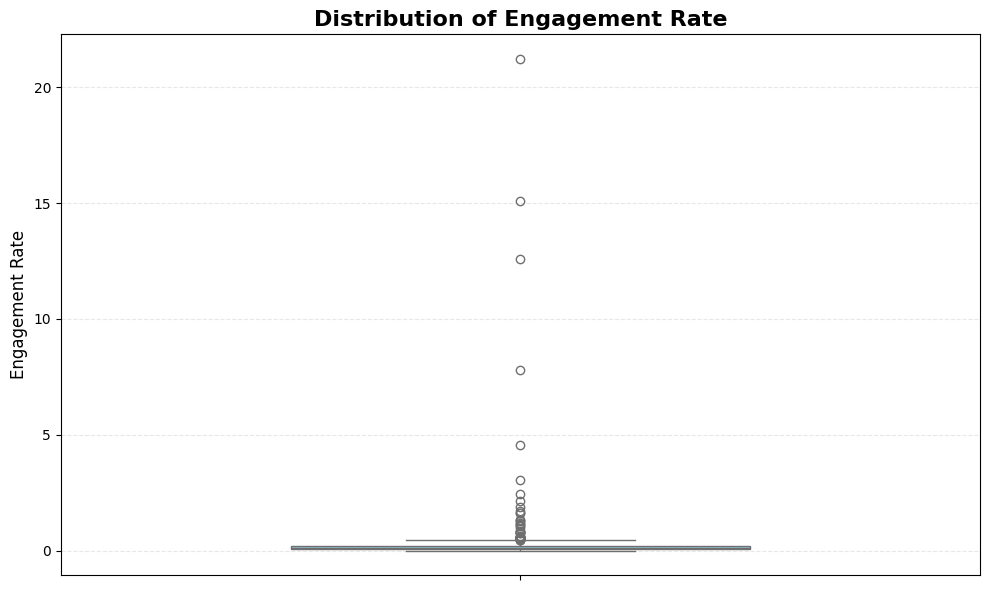

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Engagement_Rate', color='skyblue', width=0.5)
plt.title('Distribution of Engagement Rate', fontsize=16, fontweight='bold')
plt.ylabel('Engagement Rate', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## target column classify

In [25]:
# define thresholds based on business meaning, then use class weights or oversampling to handle imbalance
# removing the outlier of target class can lead to model bias towards the low segment, which is not desired in this case
# even if 5 percent classifed as high engagement, we can still understand what high corresponds to 
import pandas as pd
import numpy as np

def create_tertiles(series :pd.Series, labels:str =None)->pd.Series:
    """
    Automatically divide a numeric series into 3 range-based bins.

    series : pd.Series
    labels : list of 3 labels (optional)
    """
    if labels is None:
         labels = ["Low", "Medium", "High"] 
    # Use qcut to split into tertiles 
    return pd.qcut(series, q=[0, 0.33, 0.66, 1.0], labels=labels, duplicates="drop")


df["engagement_tertile"] = create_tertiles(df["Engagement_Rate"])
print(df)

     video_id             title  duration_sec hashtags_count   views  likes  \
0    vid_1000    Short Video #0            43              9  198775  21933   
1    vid_1001    Short Video #1            56              2  290336  20063   
2    vid_1002    Short Video #2            33              6  264206  37032   
3    vid_1003    Short Video #3            19              9   85076  27269   
4    vid_1004    Short Video #4            47              8   90780   8041   
..        ...               ...           ...            ...     ...    ...   
295  vid_1295  Short Video #295            15              3  248940  23810   
296  vid_1296  Short Video #296            32              4  366340  29586   
297  vid_1297  Short Video #297            29              3  434027   6471   
298  vid_1298  Short Video #298            54              4  318623   6459   
299  vid_1299  Short Video #299            27              6  217464  40731   

     comments  shares  upload_hour   category  Enga

In [26]:
df['engagement_tertile'].value_counts(normalize=True)

engagement_tertile
High      0.34
Low       0.33
Medium    0.33
Name: proportion, dtype: float64

In [27]:
eda_results = run_phase1_eda(df, target_col="Engagement_Rate")
eda_results

0.18
1.0
0.9966666666666667
0.96
0.9133333333333333
0.08
1.0


{'dimensions': {'rows': 300, 'cols': 12},
 'column_classification': {'numerical_features': ['duration_sec',
   'views',
   'likes',
   'comments',
   'shares',
   'upload_hour',
   'Engagement_Rate'],
  'categorical_features': ['video_id',
   'title',
   'hashtags_count',
   'category',
   'engagement_tertile']},
 'missing_values': Empty DataFrame
 Columns: [missing_count, missing_percentage]
 Index: [],
 'target_analysis': {'target_column': 'Engagement_Rate',
  'dtype': 'float64',
  'mean_engagement': np.float64(0.25666666666666665)}}

# Feature Engineering
●	Derived Textual Features: Create the required features: title_len_chars, title_word_count, and the boolean feature title_has_question_mark.
●	Rate Features: Calculate per-second engagement rates: likes_per_sec, comments_per_sec, and shares_per_sec.
●	Logarithmic Transformation: Apply log transformation to heavily skewed features like views, likes, comments, and shares (e.g., log_views) to meet model assumptions and reduce the impact of outliers.
●	Time-Based Feature: Create the binary feature is_peak_hour based on a commonly observed evening window (e.g., hours 17-21, or as defined by EDA).


In [28]:
import math
import numpy as np # Import numpy
def create_derived_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create derived textual features.
    """
    df['likespersec']=df['likes']/df['duration_sec']
    df['viewspersec']=df['views']/df['duration_sec']
    df['commentspersec']=df['comments']/df['duration_sec']
    df['sharespersec']=df['shares']/df['duration_sec']
    # Use np.log for element-wise operation on Series
    df['loglikes']=np.log(df['likespersec'] )
    df['logviews']=np.log(df['viewspersec'])
    df['logcomments']=np.log(df['commentspersec'])
    df['logshares']=np.log(df['sharespersec'])
    df['is_peak_hour']= df['upload_hour'].apply(lambda x: 1 if 17 <= x <= 21 else 0)

    # Derived Textual Features
    #df['title_len_chars'] = df['title'].apply(len)
    #df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
    #df['title_has_question_mark'] = df['title'].apply(lambda x: 1 if '?' in x else 0)

    return df
create_derived_features(df)

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category,Engagement_Rate,engagement_tertile,likespersec,viewspersec,commentspersec,sharespersec,loglikes,logviews,logcomments,logshares,is_peak_hour
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech,0.128593,Medium,510.069767,4622.674419,75.069767,9.302326,6.234548,8.438729,4.318418,2.230264,0
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy,0.088601,Medium,358.267857,5184.571429,66.410714,34.678571,5.881281,8.553442,4.195858,3.546122,0
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food,0.159258,High,1122.181818,8006.242424,97.818182,55.060606,7.023030,8.987977,4.583110,4.008435,0
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle,0.359913,High,1435.210526,4477.684211,124.789474,51.578947,7.269067,8.406861,4.826628,3.943114,0
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech,0.132639,Medium,171.085106,1931.489362,61.510638,23.595745,5.142161,7.566047,4.119210,3.161066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,vid_1295,Short Video #295,15,3,248940,23810,488,1247,12,Tech,0.102615,Medium,1587.333333,16596.000000,32.533333,83.133333,7.369811,9.716917,3.482265,4.420446,0
296,vid_1296,Short Video #296,32,4,366340,29586,46,1548,8,Travel,0.085112,Medium,924.562500,11448.125000,1.437500,48.375000,6.829321,9.345581,0.362905,3.878983,0
297,vid_1297,Short Video #297,29,3,434027,6471,3359,1069,21,Comedy,0.025111,Low,223.137931,14966.448276,115.827586,36.862069,5.407790,9.613566,4.752103,3.607183,1
298,vid_1298,Short Video #298,54,4,318623,6459,4873,1690,14,Food,0.040870,Low,119.611111,5900.425926,90.240741,31.296296,4.784246,8.682780,4.502481,3.443500,0


## distribution

In [ ]:
num_cols

['duration_sec', 'views', 'likes', 'comments', 'shares', 'upload_hour']

: 

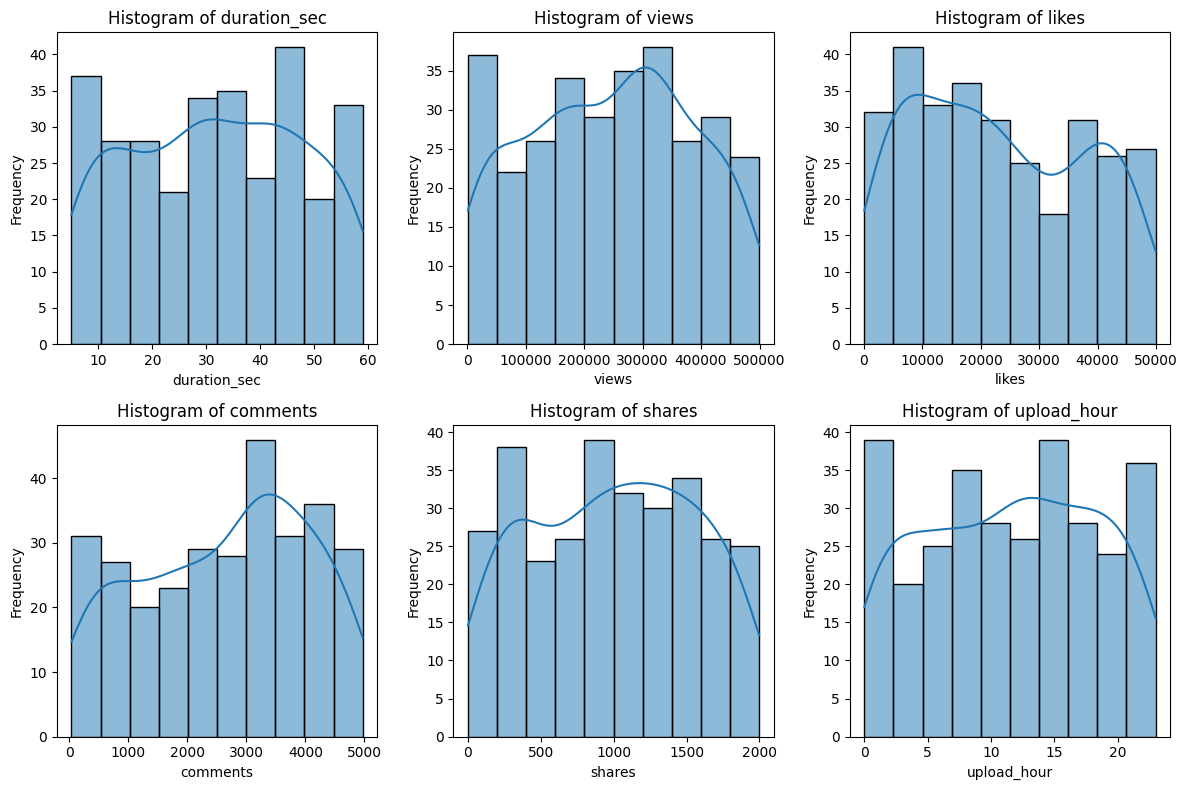

In [29]:
def visualise_num(num_col, data):
    # Determine the number of columns and rows for subplots
    num_cols = 3  # Number of columns in each row
    num_rows = (len(num_col) + 1) // num_cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Iterate through numerical columns and create histograms
    for i, column in enumerate(num_col):
        ax = axes[i]
        sns.histplot(data=data, x=column, bins=10, kde=True, ax=ax, edgecolor='black')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

visualise_num(num_cols,df)

In [30]:
def visualise_cat(cat_col,df):
    # Determine the number of columns and rows for subplots
    num_cols = 3  # Number of columns in each row
    num_rows = (len(cat_col) + 1) // num_cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Iterate through categorical columns and create bar plots
    for i, column in enumerate(cat_col):
        ax = axes[i]
        sns.countplot(data=df, x=column, ax=ax, palette="Blues")
        ax.set_title(f'Bar Plot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()
#visualise_cat(cat_cols,df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            300 non-null    category
 1   title               300 non-null    category
 2   duration_sec        300 non-null    int64   
 3   hashtags_count      300 non-null    category
 4   views               300 non-null    int64   
 5   likes               300 non-null    int64   
 6   comments            300 non-null    int64   
 7   shares              300 non-null    int64   
 8   upload_hour         300 non-null    int64   
 9   category            300 non-null    category
 10  Engagement_Rate     300 non-null    float64 
 11  engagement_tertile  300 non-null    category
 12  likespersec         300 non-null    float64 
 13  viewspersec         300 non-null    float64 
 14  commentspersec      300 non-null    float64 
 15  sharespersec        300 non-null    floa

In [ ]:
df.shape

(300, 21)

: 

## Outlier detection

In [32]:
from scipy import stats
def remove_outliers(data, num_col, threshold=3):
    # Calculate Z-scores for numerical columns
    z_scores = stats.zscore(data[num_col])

    # Identify outliers by comparing absolute Z-scores to the threshold
    outliers = np.abs(z_scores) > threshold

    # Create a boolean mask for rows that contain *no* outliers
    # We need to ensure that the index of 'outliers' aligns with 'data'
    # Z-scores are calculated only on num_col, so outliers has columns corresponding to num_col
    # To filter the original 'data', we need to align the rows.
    # Let's assume data[num_col] has the same index as data.

    # Find rows containing outliers in any numerical column (axis=1 corresponds to row)
    filtered_rows_mask = np.any(outliers, axis=1) 

    # Get the indices of the rows to keep (non-outliers)
    rows_to_keep_indices = data.index[~filtered_rows_mask]

    # Filter the original DataFrame based on these indices
    cleaned_data = data.loc[rows_to_keep_indices].reset_index(drop=True)

    return cleaned_data
df= remove_outliers(df,num_cols,threshold=3)

In [33]:
df.shape

(300, 21)

## Correlation

In [34]:
cat_cols= classify_columns(df)["categorical_features"]
num_cols= classify_columns(df)["numerical_features"]
print(df.columns)
print(cat_cols)
print(num_cols)

0.18
1.0
0.9966666666666667
0.96
0.9133333333333333
0.08
1.0
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.006666666666666667
0.18
1.0
0.9966666666666667
0.96
0.9133333333333333
0.08
1.0
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.006666666666666667
Index(['video_id', 'title', 'duration_sec', 'hashtags_count', 'views', 'likes',
       'comments', 'shares', 'upload_hour', 'category', 'Engagement_Rate',
       'engagement_tertile', 'likespersec', 'viewspersec', 'commentspersec',
       'sharespersec', 'loglikes', 'logviews', 'logcomments', 'logshares',
       'is_peak_hour'],
      dtype='object')
['video_id', 'title', 'hashtags_count', 'category', 'engagement_tertile', 'is_peak_hour']
['duration_sec', 'views', 'likes', 'comments', 'shares', 'upload_hour', 'Engagement_Rate', 'likespersec', 'viewspersec', 'commentspersec', 'sharesper

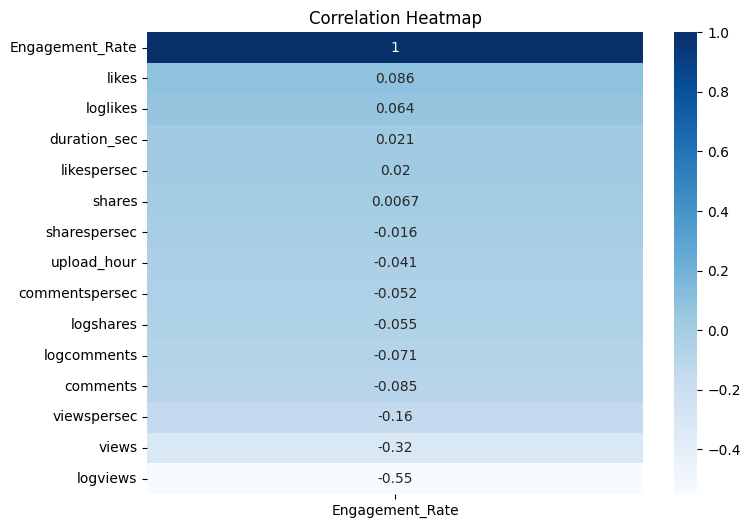

In [35]:
#all columns need to be numeric for correlation, non ordinal categorical variables should be excluded

def heat_map(data):
    # Create a figure for the heatmap
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Calculate the correlation between "loan_status" and all other columns, sort by correlation
    correlations = data.corr()["Engagement_Rate"].to_frame().sort_values(
        by="Engagement_Rate",
        ascending=False
    )

    # Generate the heatmap with annotations using the "Blues" colormap
    sns.heatmap(correlations, annot=True, cmap="Blues")

    # Set the title for the heatmap
    plt.title("Correlation Heatmap")

    # Show the plot
    plt.show()

heat_map(df[num_cols])

## removing unnecesary columns

In [36]:
# removing columns that are not needed for modeling
# likes, views, shares, comments are skewed and hence log transformation features are created
df= df.drop(columns=['video_id','title','Engagement_Rate', 'views', 'likes', 'comments', 'shares'])

In [39]:
cat_cols= classify_columns(df)["categorical_features"]
num_cols= classify_columns(df)["numerical_features"]
print(df.columns)
print(cat_cols)
print(num_cols)

0.18
0.08
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.006666666666666667
0.18
0.08
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.9966666666666667
1.0
0.9966666666666667
0.9933333333333333
0.006666666666666667
Index(['duration_sec', 'hashtags_count', 'upload_hour', 'category',
       'engagement_tertile', 'likespersec', 'viewspersec', 'commentspersec',
       'sharespersec', 'loglikes', 'logviews', 'logcomments', 'logshares',
       'is_peak_hour'],
      dtype='object')
['hashtags_count', 'category', 'engagement_tertile', 'is_peak_hour']
['duration_sec', 'upload_hour', 'likespersec', 'viewspersec', 'commentspersec', 'sharespersec', 'loglikes', 'logviews', 'logcomments', 'logshares']


# Encoding

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_sec        300 non-null    int64  
 1   hashtags_count      300 non-null    int64  
 2   upload_hour         300 non-null    int64  
 3   category            300 non-null    int64  
 4   engagement_tertile  300 non-null    int64  
 5   likespersec         300 non-null    float64
 6   viewspersec         300 non-null    float64
 7   commentspersec      300 non-null    float64
 8   sharespersec        300 non-null    float64
 9   loglikes            300 non-null    float64
 10  logviews            300 non-null    float64
 11  logcomments         300 non-null    float64
 12  logshares           300 non-null    float64
 13  is_peak_hour        300 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 32.9 KB


In [ ]:
'''cat_cols = classify_columns(df)["categorical_features"]
num_cols = classify_columns(df)["numerical_features"]

preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)],remainder='passthrough' )

#df_transformed = preprocessor.fit_transform(df)
#df_transformed.shape
 # Build pipeline with preprocessing + model
#pipeline = Pipeline(steps=[ ("preprocessor", preprocessor), ("classifier", LogisticRegression()) ])'''

'cat_cols = classify_columns(df)["categorical_features"]\nnum_cols = classify_columns(df)["numerical_features"]\n\npreprocessor = ColumnTransformer(transformers=[\n    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),\n    ("num", StandardScaler(), num_cols)],remainder=\'passthrough\' )\n\n#df_transformed = preprocessor.fit_transform(df)\n#df_transformed.shape\n # Build pipeline with preprocessing + model\n#pipeline = Pipeline(steps=[ ("preprocessor", preprocessor), ("classifier", LogisticRegression()) ])'

: 

: 

: 

: 

: 

: 

## standardization

In [ ]:

'''from sklearn.preprocessing import StandardScaler

scale_cols = df.columns.drop('Engagement_Rate')

def scale_features(df, scale_cols):
    scaler = StandardScaler()

    df[scale_cols] = scaler.fit_transform(df[scale_cols])

    return df,scaler

df,scaler_func= scale_features(df,scale_cols)
#scaler func is needed to reuse for test dataset, if a new data set comes

df.info()'''

"from sklearn.preprocessing import StandardScaler\n\nscale_cols = df.columns.drop('Engagement_Rate')\n\ndef scale_features(df, scale_cols):\n    scaler = StandardScaler()\n\n    df[scale_cols] = scaler.fit_transform(df[scale_cols])\n\n    return df,scaler\n\ndf,scaler_func= scale_features(df,scale_cols)\n#scaler func is needed to reuse for test dataset, if a new data set comes\n\ndf.info()"

: 

: 

: 

: 

: 

: 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_sec        300 non-null    int64  
 1   hashtags_count      300 non-null    int64  
 2   upload_hour         300 non-null    int64  
 3   category            300 non-null    int64  
 4   engagement_tertile  300 non-null    int64  
 5   likespersec         300 non-null    float64
 6   viewspersec         300 non-null    float64
 7   commentspersec      300 non-null    float64
 8   sharespersec        300 non-null    float64
 9   loglikes            300 non-null    float64
 10  logviews            300 non-null    float64
 11  logcomments         300 non-null    float64
 12  logshares           300 non-null    float64
 13  is_peak_hour        300 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 32.9 KB


In [ ]:
df["engagement_tertile"].value_counts()

engagement_tertile
1    296
0      2
2      2
Name: count, dtype: int64

: 

# Model training

In [ ]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate_model_cv(data, model, k=5, smote_k_neighbors=1):
    """Evaluate a model using stratified K-Fold CV with SMOTE applied inside each fold."""
    X = data.drop("engagement_tertile", axis=1)
    y = data["engagement_tertile"]
    classes = np.unique(y)
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    metric_accumulators = {"accuracy": [], "precision": [], "recall": [], "f1": []}
    confusion_total = np.zeros((len(classes), len(classes)), dtype=int)
    roc_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        clf = clone(model)
        clf.fit(X_resampled, y_resampled)

        y_pred = clf.predict(X_val)
        metric_accumulators["accuracy"].append(accuracy_score(y_val, y_pred))
        metric_accumulators["precision"].append(precision_score(y_val, y_pred, average="macro"))
        metric_accumulators["recall"].append(recall_score(y_val, y_pred, average="macro"))
        metric_accumulators["f1"].append(f1_score(y_val, y_pred, average="macro"))
        confusion_total += confusion_matrix(y_val, y_pred, labels=classes)

        y_prob = None
        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_val)
        elif hasattr(clf, "decision_function"):
            decision_scores = clf.decision_function(X_val)
            if decision_scores.ndim == 1:
                y_prob = np.vstack([1 - decision_scores, decision_scores]).T
            else:
                y_prob = decision_scores

        if y_prob is not None and y_prob.shape[1] == len(classes):
            y_val_binarized = label_binarize(y_val, classes=classes)
            roc_scores.append(roc_auc_score(y_val_binarized, y_prob, multi_class="ovr"))

    aggregated_metrics = {metric: np.mean(values) for metric, values in metric_accumulators.items()}
    roc_mean = float(np.mean(roc_scores)) if roc_scores else None
    aggregated_metrics["roc_auc"] = roc_mean

    return aggregated_metrics, confusion_total

In [ ]:
# Metric calculations (accuracy/precision/recall/f1) are performed inside evaluate_model_cv() now.

In [ ]:
K_FOLDS = 5

def models(data, k=K_FOLDS):
    results = []
    cm_data = []
    roc_data = []
    estimators = {
        "Logistic Regression": LogisticRegression(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(probability=True)
    }

    for name, model in estimators.items():
        metrics, cm_total = evaluate_model_cv(data, model, k=k)
        roc_auc = metrics.get("roc_auc")
        results.append({
            "Model": name,
            "Accuracy": metrics["accuracy"],
            "Precision": metrics["precision"],
            "Recall": metrics["recall"],
            "F1 Score": metrics["f1"],
            "ROC AUC": roc_auc if roc_auc is not None else np.nan
        })
        cm_data.append({
            "Model": name,
            "Matrix": cm_total.tolist()
        })
        roc_data.append({
            "Model": name,
            "ROC AUC": roc_auc
        })

    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)
    return results_df, cm_data, roc_data

In [ ]:
'''def pipeline(data):
    # Step 1: Classify columns as categorical or numerical

    # Step 2: Remove outliers from the dataset
    cleaned_data = remove_outliers(data, cat_col)

    # Step 3: Scale the numerical features
    scaled_data = scale_data(cleaned_data, cat_col, num_col)

    # Step 4: Evaluate model performance using different models
    performance, cm_data, roc_data = models(scaled_data)

    return performance, cm_data, roc_data'''

'def pipeline(data):\n    # Step 1: Classify columns as categorical or numerical\n\n    # Step 2: Remove outliers from the dataset\n    cleaned_data = remove_outliers(data, cat_col)\n\n    # Step 3: Scale the numerical features\n    scaled_data = scale_data(cleaned_data, cat_col, num_col)\n\n    # Step 4: Evaluate model performance using different models\n    performance, cm_data, roc_data = models(scaled_data)\n\n    return performance, cm_data, roc_data'

: 

: 

: 

: 

: 

: 

In [49]:
performance, cm_data, roc_data = models(df)

f:\Github programs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multiclass format is not supported

# Q1. Calculate the Engagement Rate for all Shorts and categorize performance into Low, Medium, and High tertiles. What is the distribution of the target variable, and does it suggest any class imbalance challenges?

In [ ]:
#pd.qcut → equal-sized groups (good for balancing classes in ML).
#pd.cut → fixed ranges (good when ranges have business meaning, e.g., income brackets).

: 

: 

: 

: 

: 

: 

In [ ]:
import pandas as pd
import numpy as np

def create_tertiles(series :pd.Series, labels:str =None)->pd.Series:
    """
    Automatically divide a numeric series into 3 range-based bins.

    series : pd.Series
    labels : list of 3 labels (optional)
    """
    if labels is None:
        labels = ["Low", "Medium", "High"]

    # Compute min and max
    min_val, max_val = series.min(), series.max()

    # Create 3 equal-width bins
    bins = np.linspace(min_val, max_val, 4)  # 4 points → 3 bins

    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)


df["tertile"] = create_tertiles(df["Engagement_Rate"])
print(df)


: 

: 

: 

: 

: 

: 

In [ ]:
import matplotlib.pyplot as plt

tertile_counts = df["engagement_tertile"].value_counts()
plt.bar(tertile_counts.index, tertile_counts.values)
plt.xlabel("Engagement Rate Tertile")
plt.ylabel("Count")
plt.title("Distribution of Engagement Rate Tertiles")
plt.show()

: 

: 

: 

: 

: 

: 

In [ ]:
df['engagement_tertile'].value_counts()

: 

: 

: 

: 

: 

: 

Yes there is class imbalance, with low engagement being high category

In [ ]:
df.info()

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

# Q2 Analyze the relationship between video duration (duration_sec) and Engagement Rate. Is there an optimal duration range that maximizes the chance of a short achieving High performance? What is the model's reliance on this feature?

In [ ]:
plt.scatter(df["duration_sec"], df["Engagement_Rate"])
plt.xlabel("Duration (seconds)")
plt.ylabel("Engagement Rate")
plt.title("Relationship between Duration and Engagement Rate")
plt.show()

: 

: 

: 

: 

: 

: 

In [ ]:
plt.scatter(df["duration_sec"], df["tertile"])


: 

: 

: 

: 

: 

: 

# Q3 Analyze the influence of the upload_hour on average Engagement Rate. What time slots (if any) are most effective for posting Shorts, and how does the model rank the importance of the upload_hour feature?

In [ ]:
df_uploadhr= df.groupby("upload_hour")["Engagement_Rate"].mean().sort_values(ascending=False).reset_index()
df_uploadhr.head(10)

: 

: 

: 

: 

: 

: 

In [ ]:
plt.scatter(df_uploadhr['upload_hour'],df_uploadhr['Engagement_Rate'])
plt.xlabel("upload_hour")
plt.ylabel("Engagement Rate")
plt.title("Relationship between upload_hour and Engagement Rate")
plt.show()

: 

: 

: 

: 

: 

: 

# Q4 Identify which content categories consistently exhibit the highest and lowest average Engagement Rates. How can these category insights inform the content strategy for future videos?

In [ ]:
df_cat=df.groupby("category")["Engagement_Rate"].mean().sort_values(ascending=False).reset_index()


: 

: 

: 

: 

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='category',y='tertile',data=df)
plt.xlabel("category")
plt.ylabel("Engagement Rate")
plt.title("Relationship between category and Engagement Rate")
plt.show()

: 

: 

: 

: 

: 

: 

# Q5 Analyze the impact of derived title features (titlelenchars, titlewordcount, titlehasquestion_mark) on model prediction. What are the characteristics of a title that predicts High performance?

: 

: 

: 

: 

: 

: 

# Q6 Identify the top 5 features (including engineered and raw variables) that the best-performing predictive model relies upon most heavily. Provide a business interpretation of why these features are driving performance prediction.

: 

: 

: 

: 

: 

: 

# Q7 Based on the cross-validation and test set results (especially F1-macro and ROC-AUC), which model is best suited for deployment, and why?

# Q8 Based on all analytical findings and model explainability, provide a concise summary of 3–5 actionable recommendations a YouTube creator can immediately implement to increase their chances of creating a viral Short.